# Credit card customer data

In [1]:
# Libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("viridis")
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Credit_Card_Customer_Data.csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
# Shape of the data set
print('The archive has '+str(df.shape[1])+' columns and '+str(df.shape[0])+' rows')

The archive has 7 columns and 660 rows


## Data Exploration and treatment

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


There are not null values. Let's see some graphs regarding the features.

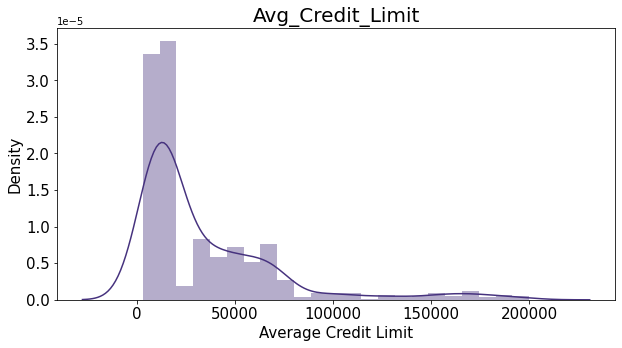

In [6]:
plt.figure(figsize=(10, 5))
sns.distplot(df['Avg_Credit_Limit']) 
plt.title('Avg_Credit_Limit', fontsize = 20, fontweight = 10)
plt.xlabel('Average Credit Limit', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

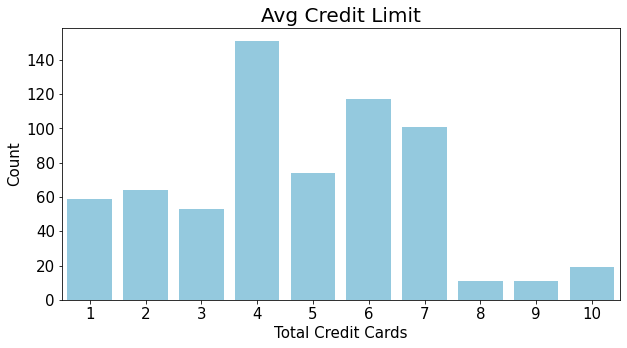

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(df['Total_Credit_Cards'], color = 'skyblue') 
plt.title('Avg Credit Limit', fontsize = 20, fontweight = 10)
plt.xlabel('Total Credit Cards', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

<Figure size 360x216 with 0 Axes>

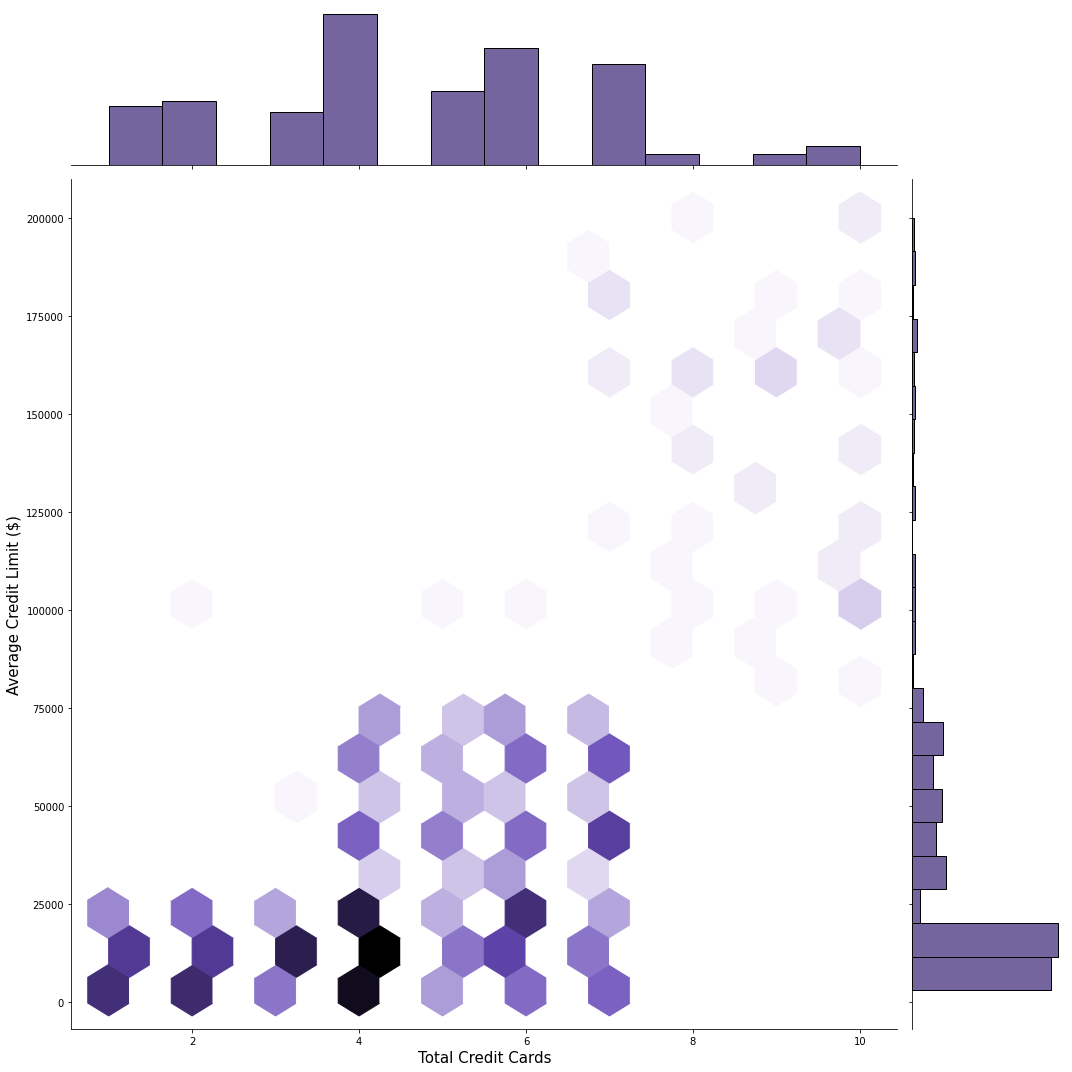

In [49]:
# Let's see the relationship between Average Credit Limit an Total Credit cards
plt.figure(figsize=(5, 3))
sns.jointplot(x=df['Total_Credit_Cards'], y=df['Avg_Credit_Limit'], kind = 'hex', height = 15)
plt.xlabel('Total Credit Cards', fontsize = 15)
plt.ylabel('Average Credit Limit ($)', fontsize = 15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

It seems obvious that the higher the credit cards owned the hight the credit car limit.

## Clusters

In [9]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [10]:
X = df[['Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]
X.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


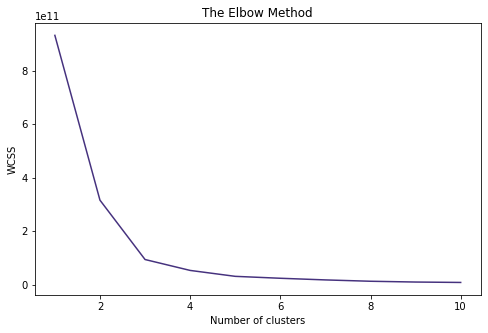

In [46]:
# Elbow method

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Sum of the distances graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We will use 3 clusters for our model

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42) 
y_kmeans = kmeans.fit_predict(X)

In [34]:
# Final DataFrame
df['Cluster'] = pd.Series(y_kmeans, index=df.index)
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,2
4,5,47437,100000,6,0,12,3,0


In [35]:
df['Cluster'] = df['Cluster'].replace([0, 1, 2], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1,87073,100000,2,1,1,0,Cluster 1
1,2,38414,50000,3,0,10,9,Cluster 1
2,3,17341,50000,7,1,3,4,Cluster 1
3,4,40496,30000,5,1,1,4,Cluster 3
4,5,47437,100000,6,0,12,3,Cluster 1


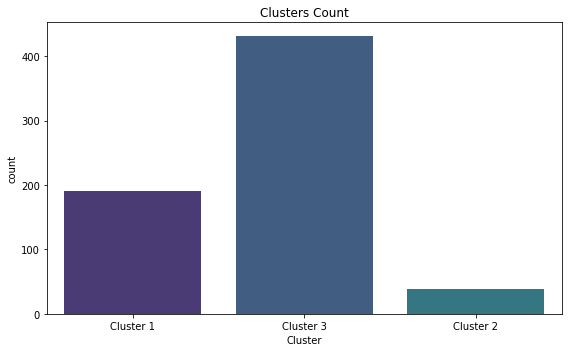

In [42]:
# Let's see the distribution of the clusters
plt.figure(figsize=(8, 5))
sns.countplot(df['Cluster'])
plt.title('Clusters Count')
plt.tight_layout()
plt.show()

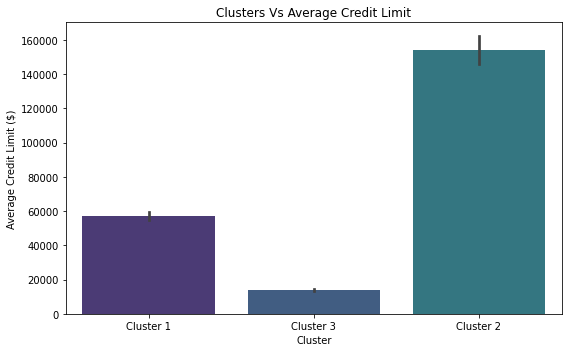

In [45]:
# Average Credit limit Vs Cluster
plt.figure(figsize=(8, 5))
sns.barplot(x=df['Cluster'], y=df['Avg_Credit_Limit'])
plt.title('Clusters Vs Average Credit Limit')
plt.ylabel('Average Credit Limit ($)')
plt.tight_layout()
plt.show()

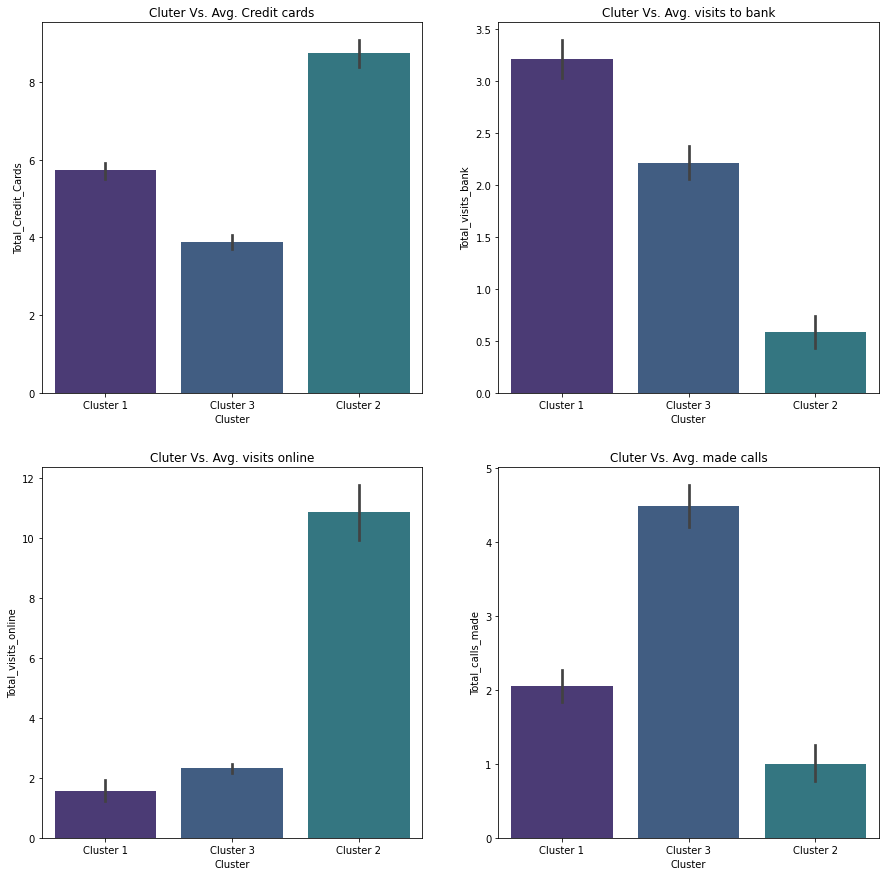

In [53]:
# Other Variables
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
sns.barplot(x=df['Cluster'], y=df['Total_Credit_Cards'], ax=axs[0, 0])
axs[0, 0].set_title('Cluter Vs. Avg. Credit cards')
sns.barplot(x=df['Cluster'], y=df['Total_visits_bank'], ax=axs[0, 1])
axs[0, 1].set_title('Cluter Vs. Avg. visits to bank')
sns.barplot(x=df['Cluster'], y=df['Total_visits_online'], ax=axs[1, 0])
axs[1, 0].set_title('Cluter Vs. Avg. visits online')
sns.barplot(x=df['Cluster'], y=df['Total_calls_made'], ax=axs[1, 1])
axs[1, 1].set_title('Cluter Vs. Avg. made calls')
plt.show()


### Insights
* Cluster 1: the medium cluster, with an average credit limit around $60.000, almost 6 credit cards, that preferes to visit the bank instead of using online platforms or calling.
* Cluster 2: the minoritarian cluster, with an average credit limit around $150.000 that average over 8 credit cards and prefers online visits over phone and bank visits. Probably upper class clients and young people
* Cluster 3: the mayoritarian cluster, with the lower credit limit around $18.000 and less than 4 credit cards. This client prefers phone contactibility over online and presencial attention. This group might represent working class people.